Fourier analysis of an image

In [1]:
%matplotlib notebook

In [7]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt
import matplotlib as mpl

In [8]:
img = cv2.imread('/home/magt/Repozytoria/GitHub/MyJupyter/img/5_03T.tif',0)

print("Image dims are: ",img.shape)


Image dims are:  (1024, 1024)


<IPython.core.display.Javascript object>


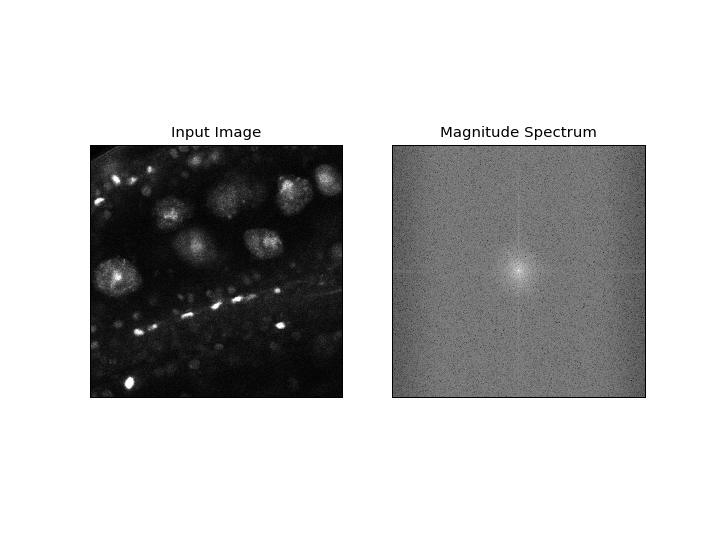

(Text(0.5,1,'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

In [9]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

In [10]:
# allows interactivity with image
%matplotlib nbagg

# line below allows to display image in fixed dpi
#plt.rcParams['figure.dpi'] = 100 # default for me was 75

# line below allows display image in a certain size
mpl.rcParams['figure.figsize'] = (8,6)

fig,ax = plt.subplots()    
myax = ax.imshow(img,cmap = 'gray',interpolation='nearest')

#setting title
ax.set_title('Read coords to crop subimage')

# displays coords pointed by the mouse. To have detailed coords - remove int() method
ax.format_coord = lambda x,y : "x=%g y=%g" % (int(x), int(y))

plt.show()

NameError: name 'matplotlib' is not defined

In [23]:
#upper-left-coords
x1 = 21
y1 = 457

#bottom right coords
x2 = 184
y2 = 607

cropped = img[x1:y1, x2:y2]

#plt.imshow(cropped,cmap = 'gray')
#plt.title('Cropped')
#plt.show()

(Text(0.5,1,'Cropped'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

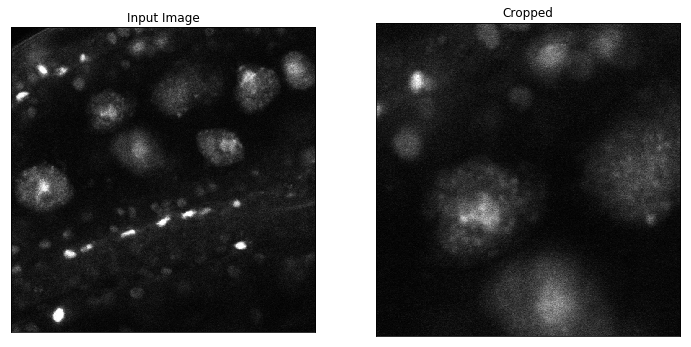

In [21]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cropped, cmap = 'gray')
plt.title('Cropped'), plt.xticks([]), plt.yticks([])

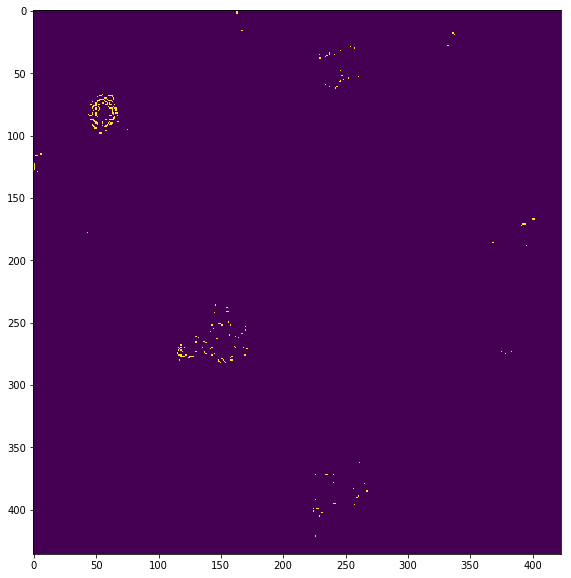

In [14]:
canny_edges = cv2.Canny(cropped, 200,200)

mpl.rcParams['figure.figsize'] = (12,10)


plt.imshow(canny_edges)
plt.show()

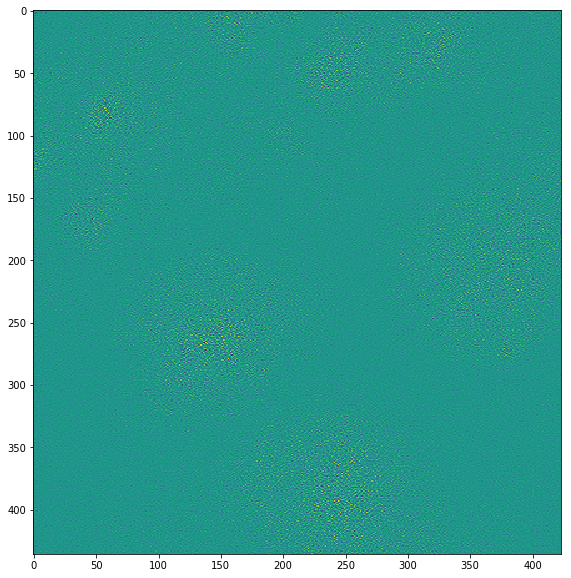

In [19]:
mpl.rcParams['figure.figsize'] = (12,10)

lpl_edges = cv2.Laplacian(cropped,cv2.CV_64F)

plt.imshow(lpl_edges)
plt.show()

<IPython.core.display.Javascript object>


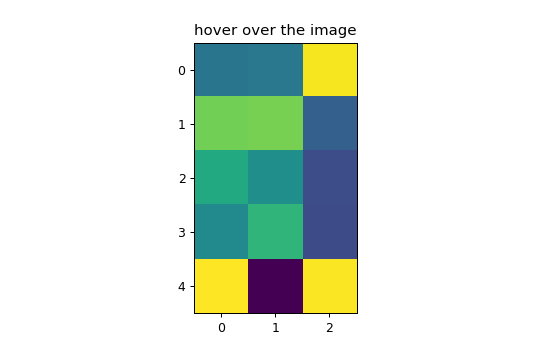

In [7]:
%matplotlib nbagg

import numpy as np  
import matplotlib.pyplot as plt

X = 10*np.random.rand(5,3)

fig,ax = plt.subplots()    
myax = ax.imshow(X,interpolation='nearest')
ax.set_title('hover over the image')

ax.format_coord = lambda x,y : "x=%g y=%g" % (x, y)

plt.show()

<IPython.core.display.Javascript object>


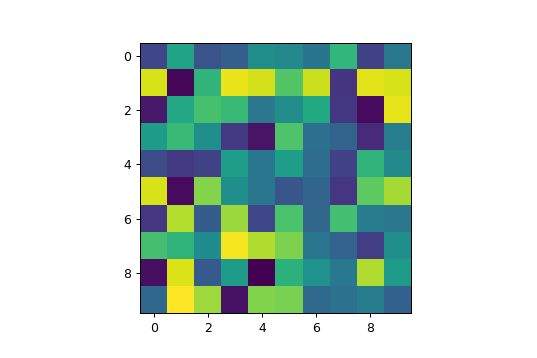

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Formatter(object):
    def __init__(self, im):
        self.im = im
    def __call__(self, x, y):
        z = self.im.get_array()[int(y), int(x)]
        return 'x={:.01f}, y={:.01f}, z={:.01f}'.format(x, y, z)

data = np.random.random((10,10))

fig, ax = plt.subplots()
im = ax.imshow(data, interpolation='none')
ax.format_coord = Formatter(im)
plt.show()